In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings


%matplotlib inline 

In [2]:
file = pd.read_excel("C:/Users/dassi/Downloads/COVID-19 County Vaccine Data-2.xlsx")
file

,County,Population > 16,People receiving at least one dose,% People receiving at least one dose,People Completely Vaccinated,Doses Administered
0,Alabama,4903185,1778271,3.626767e+01,1461323,3135348
1,Autauga,55869,17337,3.103152e+01,13682,30085
2,Baldwin,223234,77995,3.493867e+01,62524,137230
3,Barbour,24686,7771,3.147938e+01,5890,13219
4,Bibb,22394,6642,2.965973e+01,4959,11155
...,...,...,...,...,...,...
64,Unknown,-1,74208,-7.420800e+06,52547,121352
65,Walker,63521,21037,3.311818e+01,17542,36036
66,Washington,16326,4823,2.954184e+01,4088,8774
67,Wilcox,10373,4147,3.997879e+01,3283,6669


In [3]:
file.describe()

,Population > 16,People receiving at least one dose,% People receiving at least one dose,People Completely Vaccinated,Doses Administered
count,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01
mean,1.421213e+05,5.154409e+04,-1.075156e+05,4.235719e+04,9.087965e+04
std,5.911939e+05,2.151850e+05,8.933633e+05,1.768050e+05,3.794140e+05
min,-1.000000e+00,3.140000e+03,-7.420800e+06,2.425000e+03,5.449000e+03
25%,1.720500e+04,5.895000e+03,2.896621e+01,4.934000e+03,1.041400e+04
50%,3.325400e+04,9.947000e+03,3.239280e+01,8.627000e+03,1.771100e+04
75%,8.376800e+04,2.836400e+04,3.546080e+01,2.352500e+04,5.029600e+04
max,4.903185e+06,1.778271e+06,4.615464e+01,1.461323e+06,3.135348e+06


In [5]:
# Filter out rows where Population > 16 is negative or zero (Invalid data)
file = file[file['Population > 16'] > 0]

# Calculate the vaccination rate as percentage and use .loc to avoid the SettingWithCopyWarning
file.loc[:, 'Vaccination Rate (%)'] = (file['People Completely Vaccinated'] / file['Population > 16']) * 100

# Sort the counties by Vaccination Rate in descending order
sorted_file = file.sort_values(by='Vaccination Rate (%)', ascending=False)

# Display the sorted counties with vaccination rate
sorted_file[['County', 'Vaccination Rate (%)']]

,County,Vaccination Rate (%)
45,Madison,35.058419
33,Hale,34.755307
43,Lowndes,34.351224
58,Shelby,34.289074
37,Jefferson,34.073064
...,...,...
56,Randolph,21.217322
25,DeKalb,20.864738
27,Escambia,19.476974
15,Cleburne,19.154930


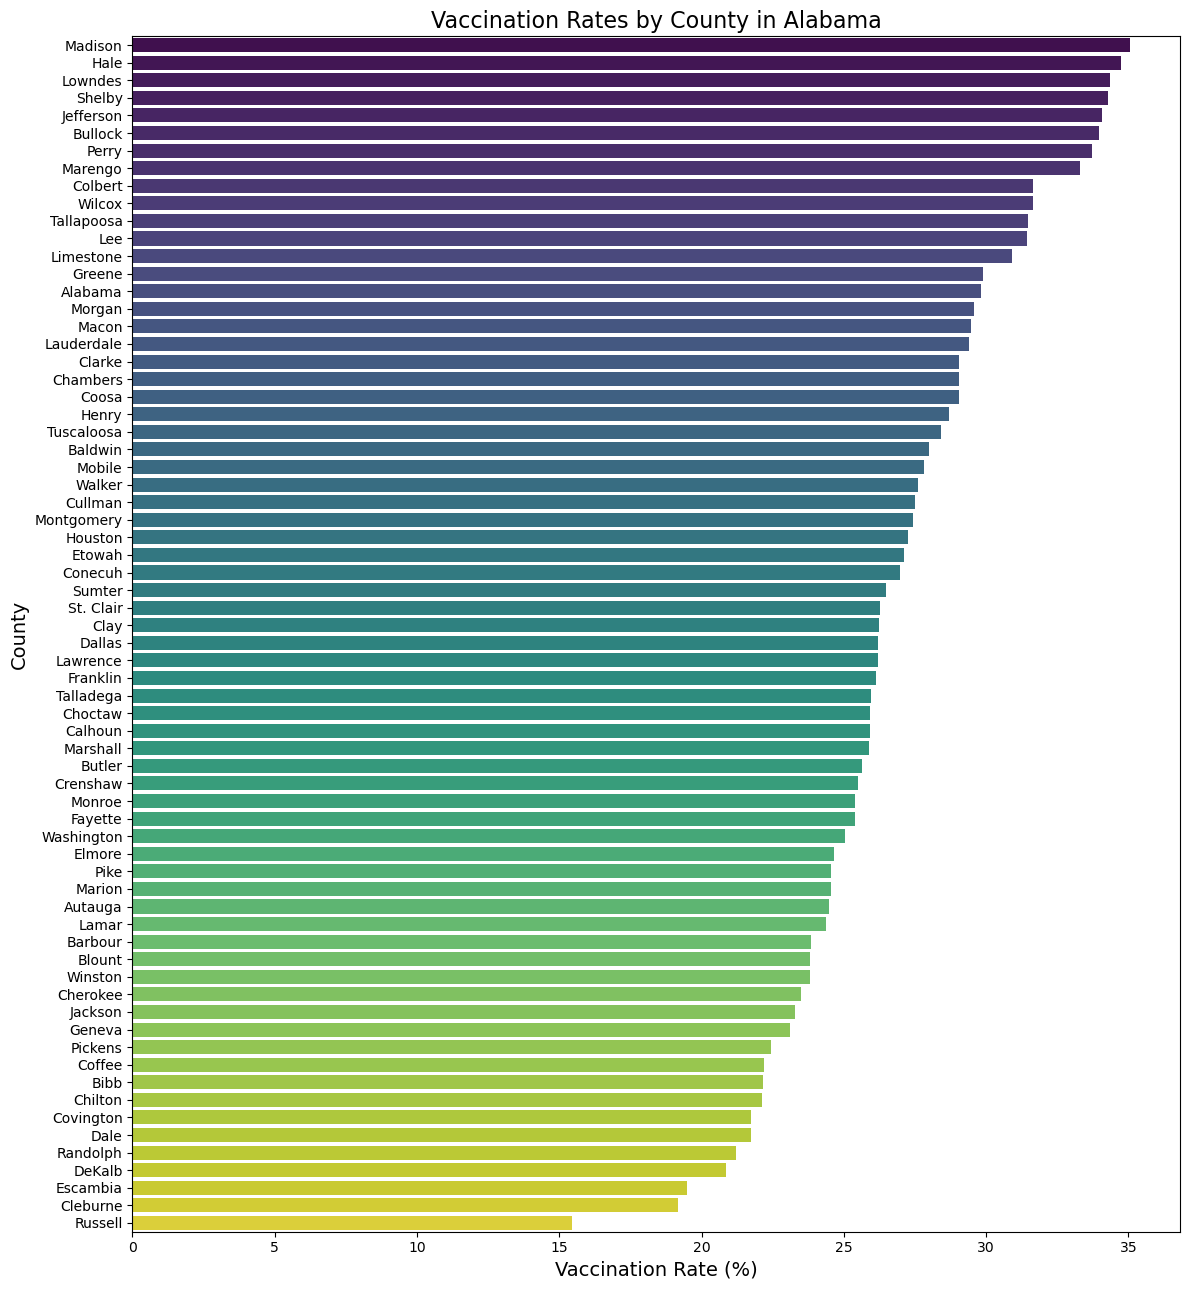

In [7]:
# Plot the bar chart
plt.figure(figsize=(12, 13))
sns.barplot(x='Vaccination Rate (%)', y='County', data=sorted_file, palette='viridis')

# Customize the plot
plt.title('Vaccination Rates by County in Alabama', fontsize=16)
plt.xlabel('Vaccination Rate (%)', fontsize=14)
plt.ylabel('County', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()